In [1]:
import nsc
from nsc.distributions import CoupledNormal, MultivariateCoupledNormal
import coupled_entropy_functions_mc_int as cef
import coupled_entropy_functions_mc_int_tfp as ceftfp
import numpy as np
import exact_coupled_entropy_functions_gaussian as cefg
from datetime import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt

Importing NSC lib v0.0.3.6.


# Coupled Entropy Testing

## Custom Integration Function

100%|██████████| 100/100 [00:01<00:00, 69.81it/s]


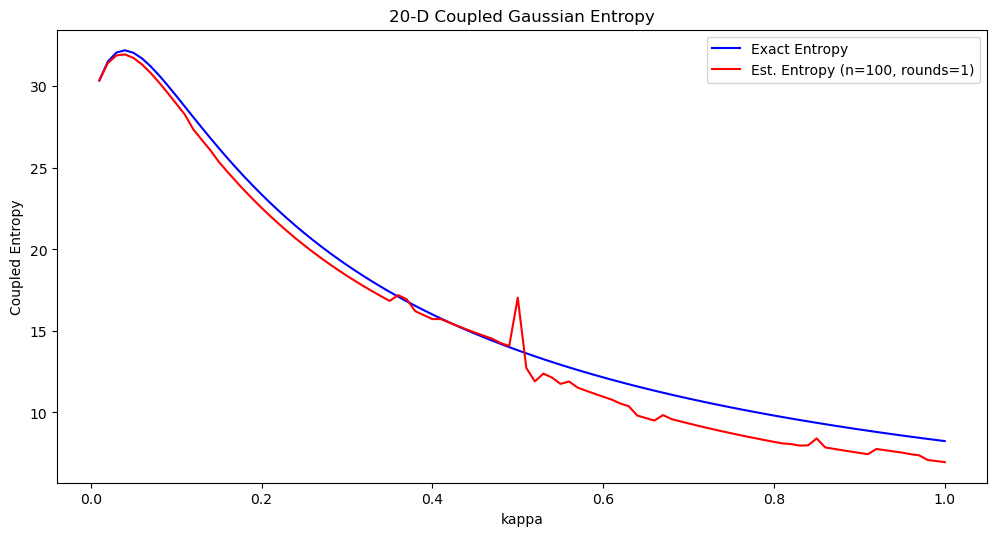

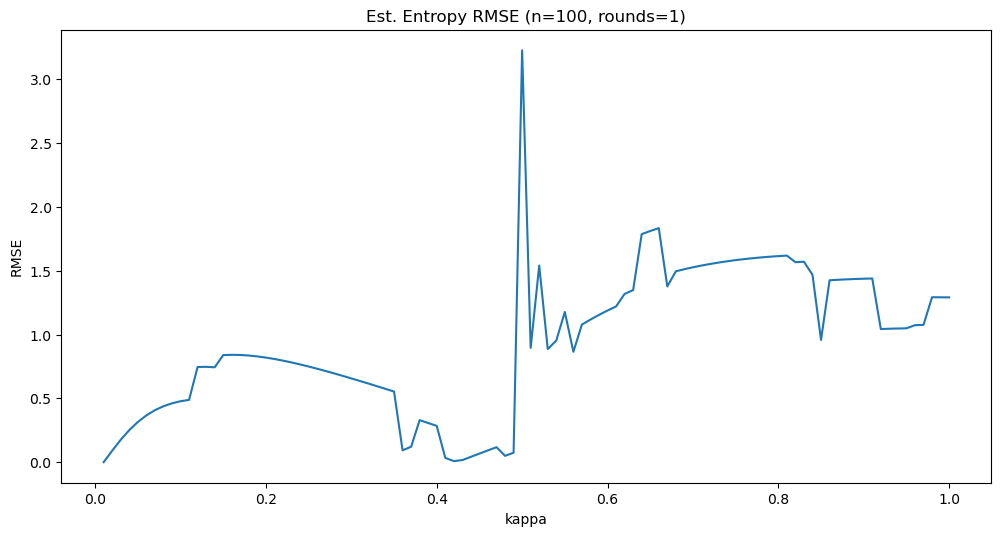

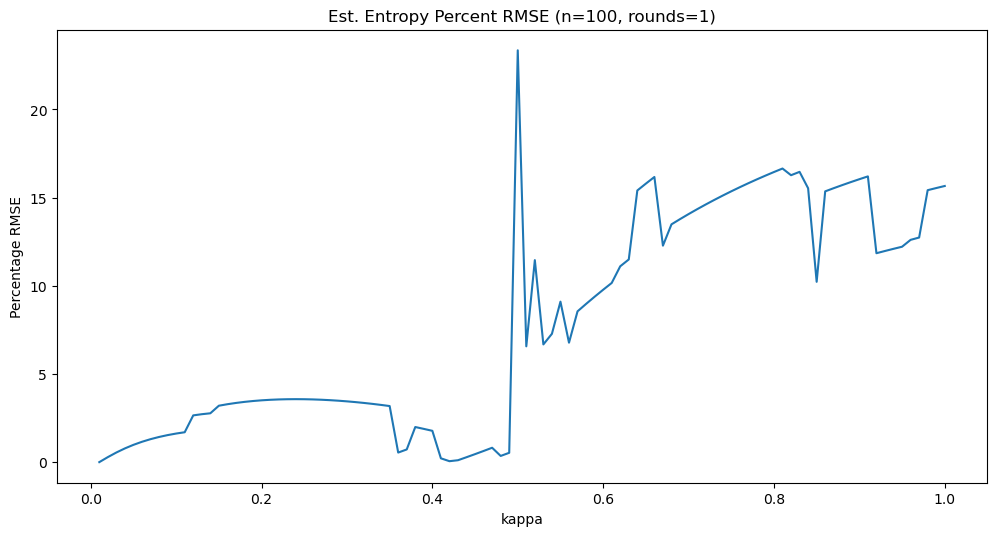

Avg. Run Time: 0.013758 seconds


In [2]:
loc, scale = 0., 1.

sample_size = 100
n_rounds = 1
dim = 20

min_kappa, max_kappa, step_kappa = 0.01, 1, 0.01
kappas = np.arange(min_kappa, max_kappa+step_kappa, step_kappa)
exact_entropies = []
approx_entropies = []
mse = []
runtimes = []
for i in tqdm(range(len(kappas))):
    kappa = kappas[i]
    nsc_temp = MultivariateCoupledNormal(loc=np.repeat(loc, dim), 
                                           scale=np.repeat(scale, dim), 
                                           kappa=kappa)

    exact_coupled_entropy = cefg.coupled_normal_entropy(nsc_temp.scale, nsc_temp.kappa)
    exact_entropies.append(exact_coupled_entropy)
    
    start_time = datetime.now()
    approx_coupled_entropy = cef.coupled_entropy(nsc_temp.prob,
                                                 nsc_temp.sample_n,
                                                 kappa=nsc_temp.kappa,
                                                 alpha=nsc_temp.alpha,
                                                 dim=nsc_temp.dim,
                                                 root=False,
                                                 n=sample_size,
                                                 rounds=n_rounds)
    runtimes.append(datetime.now() - start_time)
    approx_entropies.append(approx_coupled_entropy)
    
    mse.append((exact_coupled_entropy-approx_coupled_entropy)**2)
    
plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(kappas, exact_entropies, color="blue", label="Exact Entropy")
plt.plot(kappas, approx_entropies, color="red", label=f"Est. Entropy (n={sample_size}, rounds={n_rounds})")
plt.title(f"{dim}-D Coupled Gaussian Entropy")
plt.xlabel("kappa")
plt.ylabel("Coupled Entropy")
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(kappas, np.sqrt(mse))
plt.xlabel("kappa")
plt.ylabel("RMSE")
plt.title(f"Est. Entropy RMSE (n={sample_size}, rounds={n_rounds})")
plt.show()

plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(kappas, 100*(np.sqrt(mse)/exact_entropies))
plt.xlabel("kappa")
plt.ylabel("Percentage RMSE")
plt.title(f"Est. Entropy Percent RMSE (n={sample_size}, rounds={n_rounds})")
plt.show()

mean_time = np.mean(runtimes)
mean_seconds = mean_time.seconds + mean_time.microseconds/1000000
print(f"Avg. Run Time: {mean_seconds} seconds")

## Integration using TensorFlow Probability's Monte Carlo Expectation

100%|██████████| 100/100 [00:01<00:00, 52.60it/s]


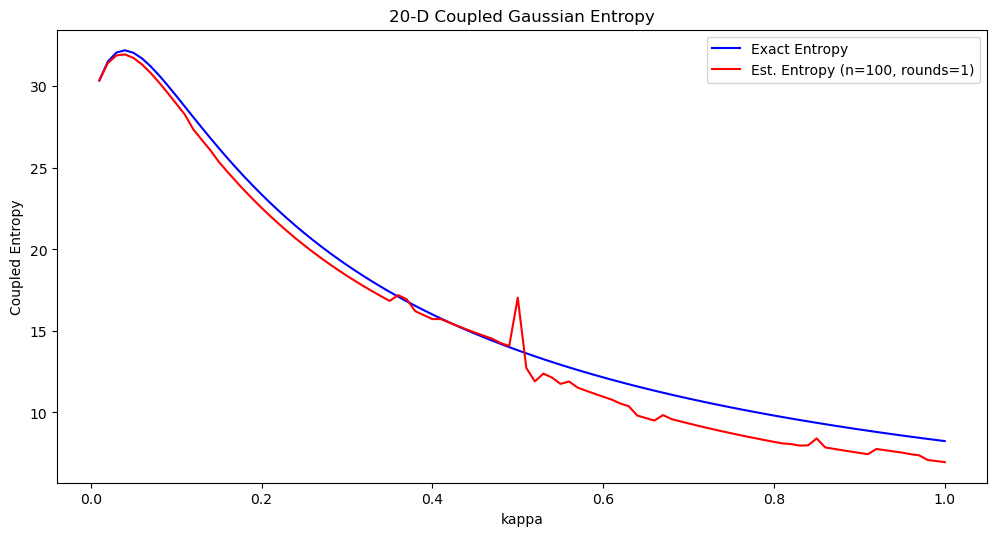

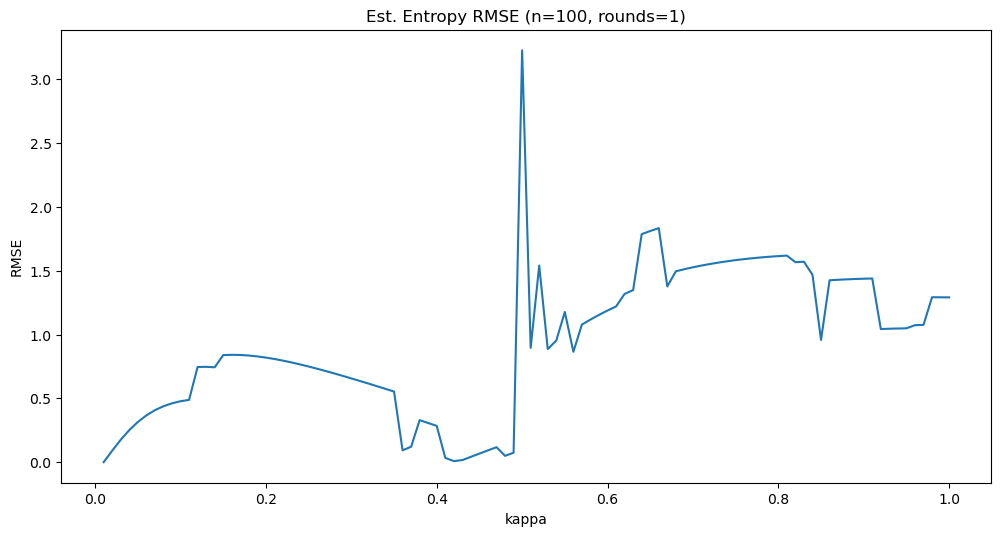

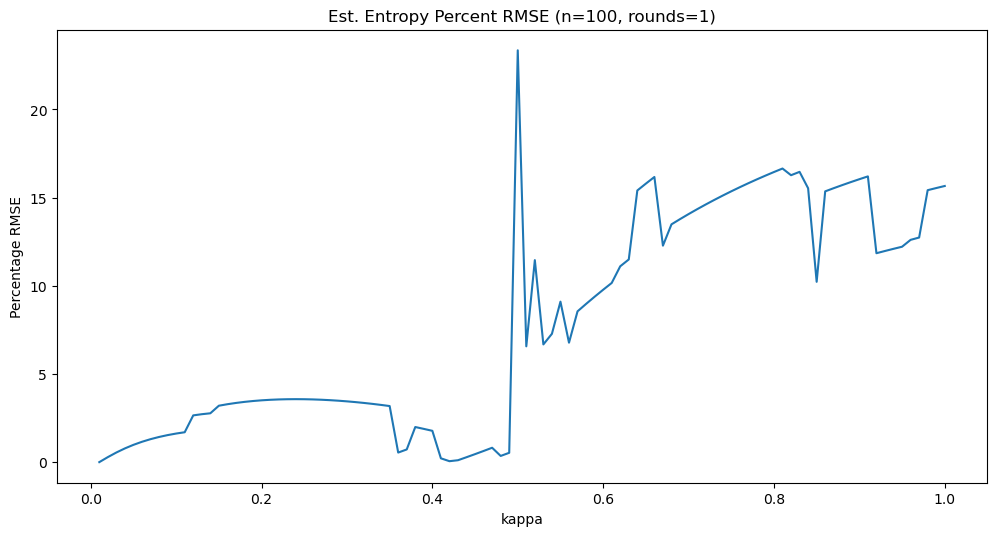

Avg. Run Time: 0.018992 seconds


In [3]:
approx_entropies_tfp = []
mse_tfp = []
runtimes_tfp = []

for i in tqdm(range(len(kappas))):
    kappa = kappas[i]
    nsc_temp = MultivariateCoupledNormal(loc=np.repeat(loc, dim), 
                                           scale=np.repeat(scale, dim), 
                                           kappa=kappa)
    
    start_time = datetime.now()
    approx_coupled_entropy_tfp = ceftfp.coupled_entropy(nsc_temp.prob,
                                                        nsc_temp.sample_n,
                                                        kappa=nsc_temp.kappa,
                                                        alpha=nsc_temp.alpha,
                                                        dim=nsc_temp.dim,
                                                        root=False,
                                                        n=sample_size,
                                                        rounds=n_rounds)
    runtimes_tfp.append(datetime.now() - start_time)
    approx_entropies_tfp.append(approx_coupled_entropy_tfp)
    
    mse_tfp.append((exact_entropies[i]-approx_coupled_entropy_tfp)**2)
    
plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(kappas, exact_entropies, color="blue", label="Exact Entropy")
plt.plot(kappas, approx_entropies_tfp, color="red", label=f"Est. Entropy (n={sample_size}, rounds={n_rounds})")
plt.title(f"{dim}-D Coupled Gaussian Entropy")
plt.xlabel("kappa")
plt.ylabel("Coupled Entropy")
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(kappas, np.sqrt(mse_tfp))
plt.xlabel("kappa")
plt.ylabel("RMSE")
plt.title(f"Est. Entropy RMSE (n={sample_size}, rounds={n_rounds})")
plt.show()

plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(kappas, 100*(np.sqrt(mse_tfp)/exact_entropies))
plt.xlabel("kappa")
plt.ylabel("Percentage RMSE")
plt.title(f"Est. Entropy Percent RMSE (n={sample_size}, rounds={n_rounds})")
plt.show()

mean_time_tfp = np.mean(runtimes_tfp)
mean_seconds_tfp = mean_time_tfp.seconds + mean_time_tfp.microseconds/1000000
print(f"Avg. Run Time: {mean_seconds_tfp} seconds")

## Using my Integration Function calculating Coupled Probability Exactly

100%|██████████| 100/100 [00:00<00:00, 120.29it/s]


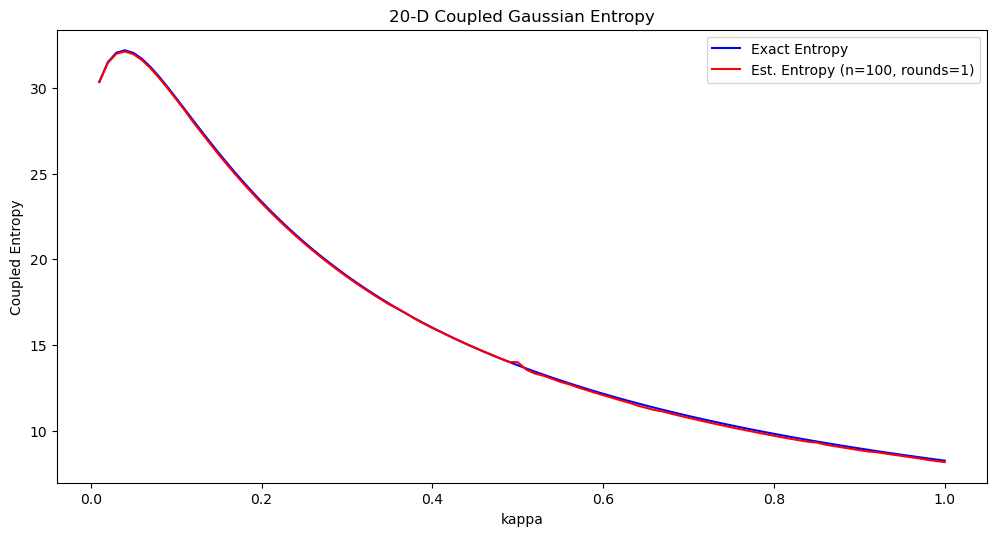

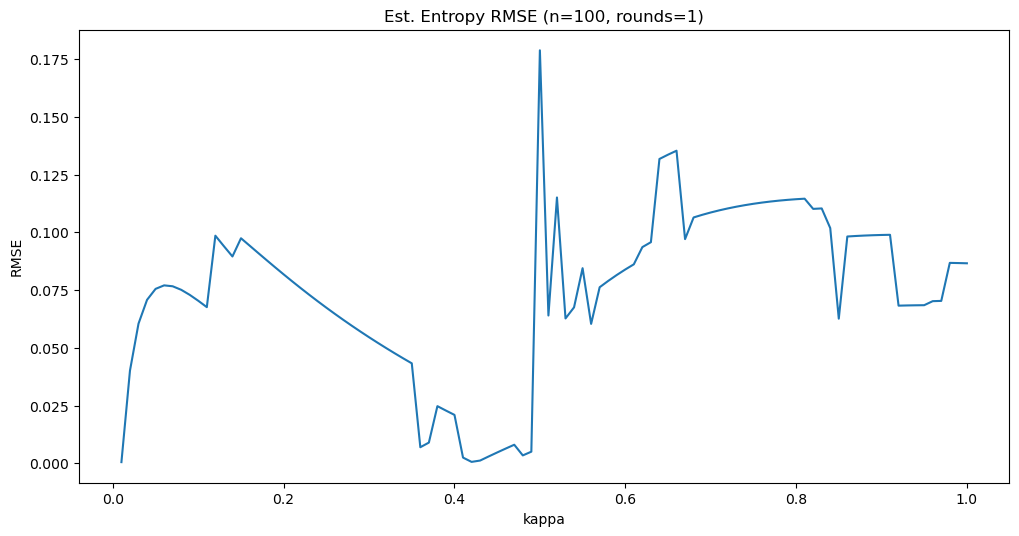

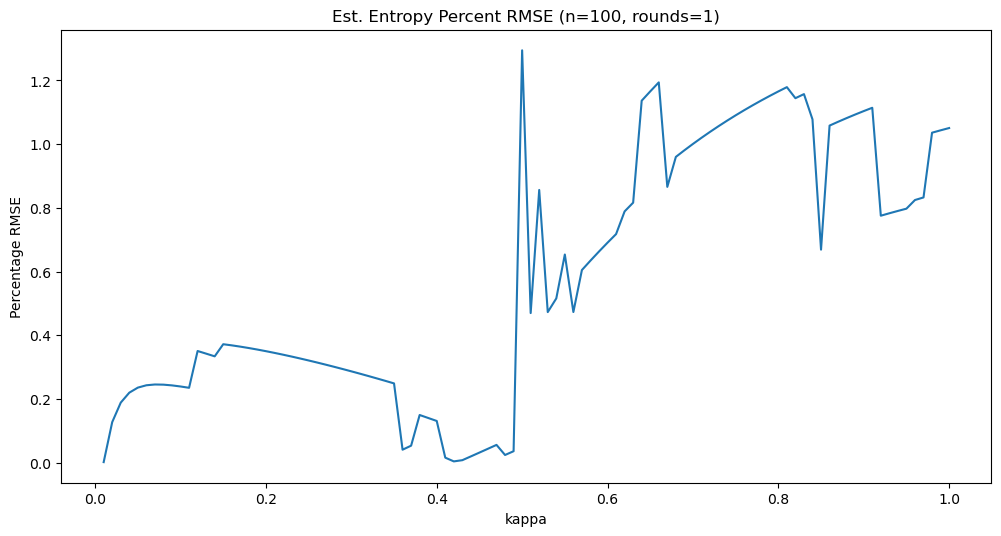

Avg. Run Time: 0.018992 seconds


In [4]:
approx_entropies_norm = []
mse_norm = []
runtimes_norm = []

for i in tqdm(range(len(kappas))):
    kappa = kappas[i]
    nsc_temp = MultivariateCoupledNormal(loc=np.repeat(loc, dim), 
                                           scale=np.repeat(scale, dim), 
                                           kappa=kappa)
    
    start_time = datetime.now()
    approx_coupled_entropy_norm = cefg.coupled_entropy_norm(nsc_temp,
                                                            kappa=nsc_temp.kappa,
                                                            alpha=nsc_temp.alpha,
                                                            root=False,
                                                            n=sample_size,
                                                            rounds=n_rounds)
    runtimes_norm.append(datetime.now() - start_time)
    approx_entropies_norm.append(approx_coupled_entropy_norm)
    
    mse_norm.append((exact_entropies[i]-approx_coupled_entropy_norm)**2)
    
plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(kappas, exact_entropies, color="blue", label="Exact Entropy")
plt.plot(kappas, approx_entropies_norm, color="red", label=f"Est. Entropy (n={sample_size}, rounds={n_rounds})")
plt.title(f"{dim}-D Coupled Gaussian Entropy")
plt.xlabel("kappa")
plt.ylabel("Coupled Entropy")
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(kappas, np.sqrt(mse_norm))
plt.xlabel("kappa")
plt.ylabel("RMSE")
plt.title(f"Est. Entropy RMSE (n={sample_size}, rounds={n_rounds})")
plt.show()

plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(kappas, 100*(np.sqrt(mse_norm)/exact_entropies))
plt.xlabel("kappa")
plt.ylabel("Percentage RMSE")
plt.title(f"Est. Entropy Percent RMSE (n={sample_size}, rounds={n_rounds})")
plt.show()

mean_time_norm = np.mean(runtimes_tfp)
mean_seconds_norm = mean_time_tfp.seconds + mean_time_tfp.microseconds/1000000
print(f"Avg. Run Time: {mean_seconds_tfp} seconds")

## Timing

In [16]:
sample_sizes = np.arange(1000, 10000+1, 1000)
n_rounds = 5
dim = 20
samp_sizes = []
runtimes = []
runtimes_tfp = []
runtimes_norm = []
mse = []
mse_tfp = []
mse_norm = []

nsc_temp = MultivariateCoupledNormal(loc=np.repeat(loc, dim), 
                                     scale=np.repeat(scale, dim),
                                     kappa=0.01)
exact_coupled_entropy = cefg.coupled_normal_entropy(nsc_temp.scale, nsc_temp.kappa)

seeds = np.arange(1, 1000, 1)

for i in tqdm(range(len(sample_sizes))):
    sample_size = sample_sizes[i]
    for j in range(n_rounds):
        
        samp_sizes.append(sample_size)
        seed = np.random.choice(seeds, 1)
        
        start_time = datetime.now()
        approx_coupled_entropy = cef.coupled_entropy(nsc_temp.prob,
                                                     nsc_temp.sample_n,
                                                     kappa=nsc_temp.kappa,
                                                     alpha=nsc_temp.alpha,
                                                     dim=nsc_temp.dim,
                                                     root=False,
                                                     n=sample_size,
                                                     rounds=1,
                                                     seed=seed)
        runtimes.append(datetime.now() - start_time)
        
        mse.append((exact_coupled_entropy-approx_coupled_entropy)**2)
        
        start_time = datetime.now()
        approx_coupled_entropy = ceftfp.coupled_entropy(nsc_temp.prob,
                                                        nsc_temp.sample_n,
                                                        kappa=nsc_temp.kappa,
                                                        alpha=nsc_temp.alpha,
                                                        dim=nsc_temp.dim,
                                                        root=False,
                                                        n=sample_size,
                                                        rounds=1,
                                                        seed=seed)
        runtimes_tfp.append(datetime.now() - start_time)
        
        mse_tfp.append((exact_coupled_entropy-approx_coupled_entropy)**2)
        
        start_time = datetime.now()
        approx_coupled_entropy = cefg.coupled_entropy_norm(nsc_temp,
                                                           kappa=nsc_temp.kappa,
                                                           alpha=nsc_temp.alpha,
                                                           root=False,
                                                           n=sample_size,
                                                           rounds=1,
                                                           seed=seed)
        runtimes_norm.append(datetime.now() - start_time)
        
        mse_norm.append((exact_coupled_entropy-approx_coupled_entropy)**2)
        
runtimes = [time.seconds + time.microseconds/1000000 for time in runtimes]
runtimes_tfp = [time.seconds + time.microseconds/1000000 for time in runtimes_tfp]
runtimes_norm = [time.seconds + time.microseconds/1000000 for time in runtimes_norm]

plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(samp_sizes, runtimes, 
            color="blue",
            label="John's Implementation",
            alpha=0.5)
plt.scatter(samp_sizes, runtimes_tfp,
            color="red",
            label="TFP",
            alpha=0.5)
plt.scatter(samp_sizes, runtimes_norm,
            color="green",
            label="Gaussian",
            alpha=0.5)
plt.ylabel("Seconds")
plt.xlabel("Sample Size")
plt.title("Runtimes vs. Sample Size")
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(samp_sizes, mse, 
            color="blue",
            label="John's Implementation",
            alpha=0.5)
plt.scatter(samp_sizes, mse_tfp,
            color="red",
            label="TFP",
            alpha=0.5)
plt.scatter(samp_sizes, mse_norm,
            color="green",
            label="Gaussian",
            alpha=0.5)
plt.ylabel("MSE")
plt.xlabel("Sample Size")
plt.title("MSE vs. Sample Size")
plt.legend(loc="upper right")
plt.show()

100%|██████████| 10/10 [01:08<00:00,  6.87s/it]


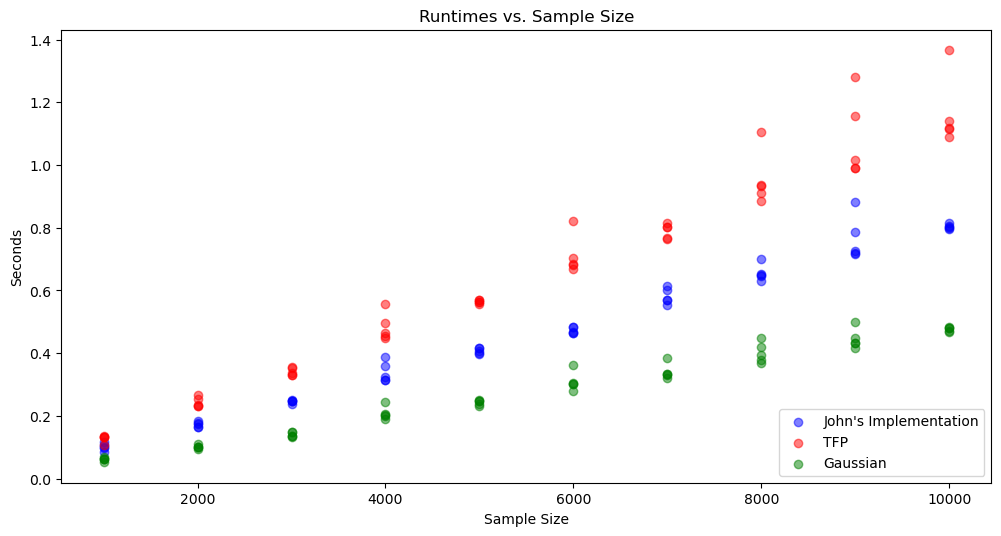

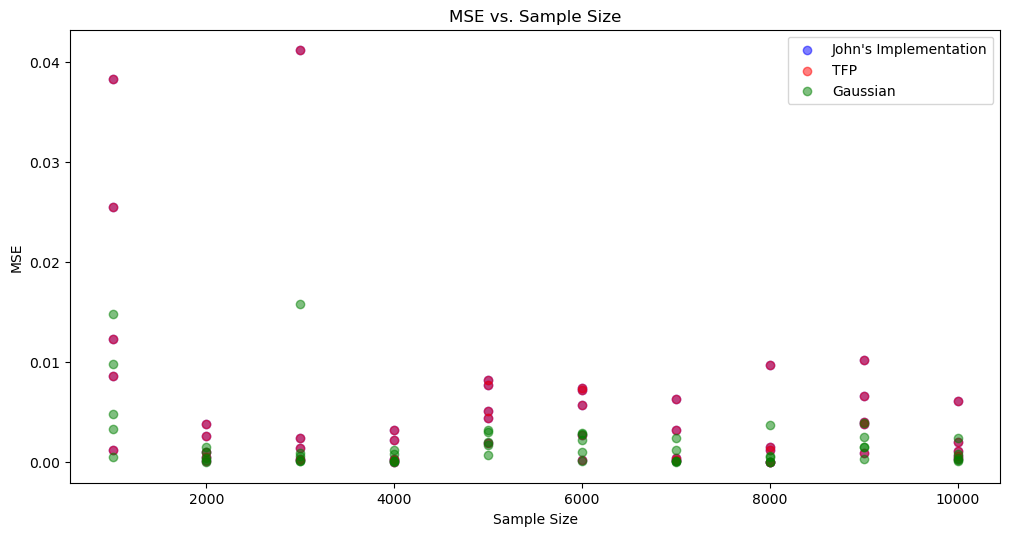